In [3]:
from sympy import symbols, init_printing, simplify, solve
from fdlib import *
init_printing()

In [4]:
dx, dt, x, y, z, t, c, h = symbols('dx dt x y z t c h')
U = IndexedBase('U')
# 2nd order approximation
n = 2
# list of variables
l = [x,y,t]

In [5]:
# get the derivative expressions
# using dx = dy = h
Uxx = Deriv(U,l,0,h,n)[2]
Uyy = Deriv(U,l,1,h,n)[2]
Utt = Deriv(U,l,2,dt,n)[2]

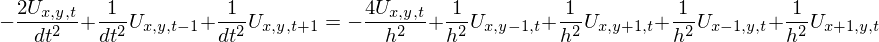

In [6]:
# 2d wave equation
eq = Eq(Utt, (Uxx+Uyy))
eq

In [7]:
# generate C code for the body of the loop
code = print_myccode(U[x,y,t+1]) + "=" + print_myccode(simplify(solve(eq, U[x,y,t+1])[0]))
code

'U[x][y][t + 1]=(-4*pow(dt, 2)*U[x][y][t] + pow(dt, 2)*U[x][y - 1][t] + pow(dt, 2)*U[x][y + 1][t] + pow(dt, 2)*U[x - 1][y][t] + pow(dt, 2)*U[x + 1][y][t] + pow(h, 2)*(2*U[x][y][t] - U[x][y][t - 1]))/pow(h, 2)'